In [1]:
# Looking at rest-frame wavelength ranges for each of the 9 slacs lenses.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# create dataframe of redshifts
names = ['SDSSJ0029-0055',
         'SDSSJ0037-0942',
         'SDSSJ1630+4520',
         'SDSSJ2303+1422',
         'SDSSJ0330-0020',
         'SDSSJ1306+0600',
         'SDSSJ1627-0053',
         'SDSSJ1531-0105',
         'SDSSJ1621+3931',
        ]

deflector_z = [0.227,
                0.195,
                0.351,
                0.173,
                0.16,
                0.245,
                0.208,
                0.248,
                0.155,
              ]

objects = pd.DataFrame({'object_id' : names,
                          'z_d' : deflector_z}
                        )

objects

,object_id,z_d
0,SDSSJ0029-0055,0.227
1,SDSSJ0037-0942,0.195
2,SDSSJ1630+4520,0.351
3,SDSSJ2303+1422,0.173
4,SDSSJ0330-0020,0.160
5,SDSSJ1306+0600,0.245
6,SDSSJ1627-0053,0.208
7,SDSSJ1531-0105,0.248
8,SDSSJ1621+3931,0.155


In [8]:
# BL grating is 350-560 nm ... uvb in xshooter library is 300–556 nm
# ca h and k is 3969 and 3934 Angstroms

objects['lambda_min'] = 350 / (1 + objects['z_d'])
objects['lambda_max'] = 560 / (1 + objects['z_d'])

objects

,object_id,z_d,lambda_min,lambda_max
0,SDSSJ0029-0055,0.227,285.248574,456.397718
1,SDSSJ0037-0942,0.195,292.887029,468.619247
2,SDSSJ1630+4520,0.351,259.067358,414.507772
3,SDSSJ2303+1422,0.173,298.380222,477.408355
4,SDSSJ0330-0020,0.160,301.724138,482.758621
5,SDSSJ1306+0600,0.245,281.124498,449.799197
6,SDSSJ1627-0053,0.208,289.735099,463.576159
7,SDSSJ1531-0105,0.248,280.448718,448.717949
8,SDSSJ1621+3931,0.155,303.030303,484.848485


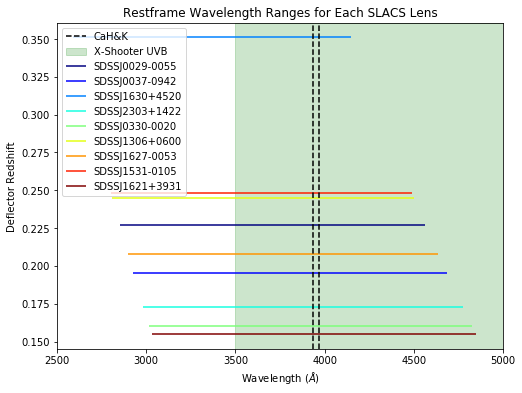

In [60]:
fig, ax = plt.subplots(figsize=(8,6)) 

cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, len(objects)))

# restframe observed range for each lens
for i in range(len(objects)):
    ax.hlines(objects.loc[i, 'z_d'], objects.loc[i, 'lambda_min']*10, objects.loc[i, 'lambda_max']*10, label=objects.loc[i, 'object_id'], color=colors[i])

# ca h and k lines
ax.axvline(3969, 0, 1, c='k', linestyle='--', label='CaH&K')
ax.axvline(3934, 0, 1, c='k', linestyle='--')

# xshooter uvb range
ax.axvspan(3500, 5600, alpha=0.2, color='green', label='X-Shooter UVB')

ax.set_xlim(2500, 5000)
ax.set_xlabel(r'Wavelength (${\AA}$)')
ax.set_ylabel('Deflector Redshift')

ax.set_xticks(np.arange(2500, 5500, 500))
ax.set_title('Restframe Wavelength Ranges for Each SLACS Lens')
ax.legend()